## Topic Modelling

We have downloaded some speeches by B. Obama and M. Romney made during US Presidential election 2012. The speeches are uploaded on GitHUB and we would try to find some imortant topics each of their speeches consisted of. We will do Topic modelling using Gensim and visualize these topics using a womderful package called pyLDAvis.

In [1]:
# Find folders and text under a given path
import os

# For dataframe/tables
import pandas as pd
import numpy as np

# Default dictionary
from collections import defaultdict

# Gensim
from gensim import corpora
from gensim import models

# Model evaluation
from gensim.models import CoherenceModel

# Visualization
from matplotlib import pyplot as plt
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

C:\Users\acer\Anaconda3\envs\py35\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# corpus folder
folder = 'tmp'

# Corpus 
corpus_bow = dict()

# Load the corpus
for fld in next(os.walk(folder))[1] :
    for corpus in os.listdir(folder + os.sep + fld):
        file = os.getcwd() + os.sep + folder + os.sep + fld + os.sep + corpus
        if os.path.splitext(file)[1] == '.mm' :
            corpus_bow[fld] = list(corpora.mmcorpus.MmCorpus(file))            

# dictionary 
for item in next(os.walk(folder))[2] :
    file = os.getcwd() + os.sep + folder + os.sep + item
    if os.path.splitext(file)[1] == '.dict' :        
        corpus_dict = corpora.Dictionary.load(file)


In [3]:
# Transform corpus to Tf-idf
corpus_tfidf = dict()
for fld in corpus_bow.keys() :    
    Tfidf = models.TfidfModel(corpus_bow[fld], smartirs='ntc')
    corpus_tfidf[fld] = Tfidf[corpus_bow[fld]]    


In [4]:
# LSI model
lsi = dict()
num_topics = 15 
num_words = 15

for fld in corpus_tfidf.keys() :
    lsi[fld] = models.LsiModel(corpus_tfidf[fld], id2word=corpus_dict, num_topics=num_topics)


In [5]:
# Display the topics and words associated
for fld in corpus_tfidf.keys() :    
    print('*'*80)
    print(fld.upper())
    print(pd.DataFrame({"Topic "+ str(i+101)[1:]:[topic[0] for topic in lsi[fld].show_topic(i,num_words)] \
                                    for i in range(num_topics)}, index = [i+1 for i in range(num_words)] ))

********************************************************************************
ROMNEY
        Topic 01      Topic 02      Topic 03      Topic 04       Topic 05  \
1            and     apologies  reply_cancel  reply_cancel       applause   
2   conservative       request    view_leave    view_leave       marriage   
3        promise       nothing         reply         reply       religion   
4        liberal        search          simi       promise          adult   
5    immigration       perhaps       library   immigration          marry   
6           good          page         tweet       tonight   conservative   
7           year         found    california      religion    middle_east   
8         crisis          find        valley   middle_east          peace   
9   unemployment          help      applause         peace  mother_father   
10          help           and       tonight      marriage       audience   
11           dad       promise  conservative  conservative       

In [6]:
#corpus_dict[id]
textlist = dict()
for fld in corpus_tfidf.keys() :
    textlist[fld] = [[corpus_dict[text_tup[0]] for text_tup in doc for _ in range(int(text_tup[1]))] for doc in corpus_bow[fld]]

In [24]:
# LDA model - evaluation
num_of_passes = 10
x = defaultdict(list); y = defaultdict(list); z = defaultdict(list)
for fld in corpus_tfidf.keys() :
    for num_topics in range(5,15,1) :
        lda_model = models.LdaModel(corpus_tfidf[fld], id2word=corpus_dict, num_topics=num_topics, passes = num_of_passes,\
                                  chunksize=100, random_state=123, update_every=1)
        coherence_model_lda = CoherenceModel(model=lda_model,texts = np.squeeze(textlist[fld]), dictionary=corpus_dict, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        x[fld].append(num_topics) ; y[fld].append(coherence_score)
        print("{}'s speech : Number of topics is {}, coherence score is {}".format(fld,num_topics,coherence_score))


romney's speech : Number of topics is 5, coherence score is 0.5809501376307689
romney's speech : Number of topics is 6, coherence score is 0.6343029915908766
romney's speech : Number of topics is 7, coherence score is 0.612294778114671
romney's speech : Number of topics is 8, coherence score is 0.5699710765494734
romney's speech : Number of topics is 9, coherence score is 0.6023755435566591
romney's speech : Number of topics is 10, coherence score is 0.6108251453173678
romney's speech : Number of topics is 11, coherence score is 0.6318222104195751
romney's speech : Number of topics is 12, coherence score is 0.6048703181373057
romney's speech : Number of topics is 13, coherence score is 0.5688290234513554
romney's speech : Number of topics is 14, coherence score is 0.5650391123706332
obama's speech : Number of topics is 5, coherence score is 0.5717630998590806
obama's speech : Number of topics is 6, coherence score is 0.49526353460965716
obama's speech : Number of topics is 7, coherence

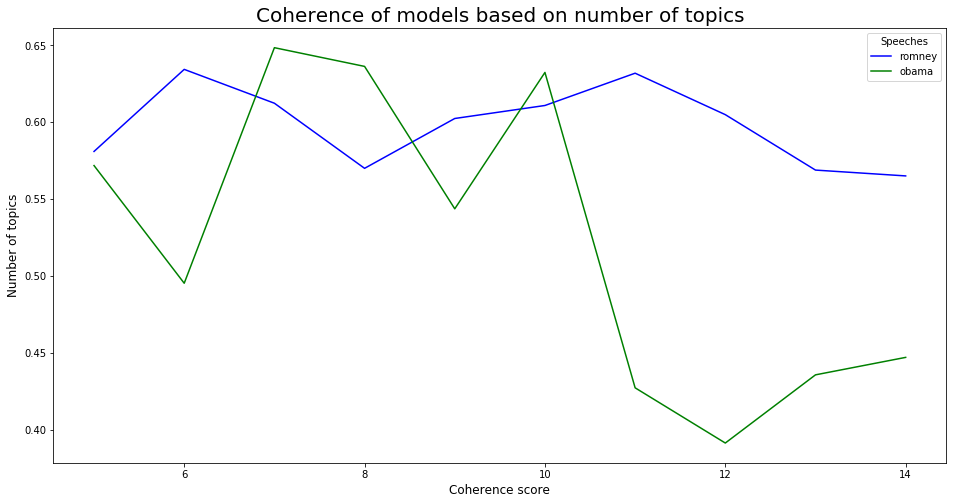

In [25]:
# Plot the coherence
plt.figure(figsize=(16,8))
col = dict()
col['obama'] = 'green'; col['romney'] = 'blue'
for fld in corpus_tfidf.keys() :
    plt.plot(x[fld],y[fld], color=col[fld], label=fld)
plt.legend(title='Speeches')
plt.title("Coherence of models based on number of topics", fontsize=20)
plt.xlabel("Coherence score",fontsize=12)
plt.ylabel("Number of topics",fontsize=12)
plt.show()

In [18]:
# LDA - final model
num_of_passes = 10
lda = dict(); num_topics = dict()
num_topics['obama'] = 12;  num_topics['romney'] = 11
num_words = 15

for fld in corpus_tfidf.keys() :
    lda[fld] = models.LdaModel(corpus_tfidf[fld], id2word=corpus_dict, num_topics=num_topics[fld], passes = num_of_passes,\
                              chunksize=100, random_state=123, update_every=1)


In [19]:
# Display the topics and words associated
for fld in corpus_tfidf.keys() :  
    print('*'*80)
    print(fld.upper())
    print(pd.DataFrame({"Topic "+ str(i+101)[1:]:[topic[0] for topic in lda[fld].show_topic(i,num_words)] \
                                    for i in range(num_topics[fld])}, index = [i+1 for i in range(num_words)] ))

********************************************************************************
ROMNEY
       Topic 01   Topic 02       Topic 03     Topic 04        Topic 05  \
1      applause      marry           simi  immigration          closed   
2         kerry   remember        library         half    view_comment   
3          iowa      adult         valley      company     middle_east   
4         derek    society     california        legal           peace   
5       retiree  transform       abortion   unfairness            ally   
6   interesting   marriage            may        guard            duty   
7          fire      plant     transcript      tonight  nuclear_weapon   
8         waste     little   presidential        tough          threat   
9       vietnam    tonight           cold        unite          region   
10      husband        era     manchester    immigrant      capability   
11   redundancy     grader         broken        heart          regime   
12   attractive       oh

In [20]:
# Visualize - LDA using pyLDAvis
vis = dict()
for fld in corpus_tfidf.keys() :
    vis[fld] = pyLDAvis.gensim.prepare(lda[fld],corpus=corpus_tfidf[fld],dictionary=corpus_dict, mds = 'mmds')

C:\Users\acer\Anaconda3\envs\py35\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [21]:
# Print topics in Romney's speeches
print(list(corpus_tfidf.keys())[0])
vis[list(corpus_tfidf.keys())[0]]

romney


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
7      54.037266        1       1 -0.036610  0.036293
4       9.697251        1       2  0.004770 -0.012892
3       8.586766        1       3 -0.006315 -0.008272
1       6.710526        1       4  0.002381  0.004436
8       3.876105        1       5  0.010239 -0.005111
9       3.865455        1       6  0.005075 -0.003487
0       3.553815        1       7  0.005797  0.000405
5       3.230691        1       8  0.001963 -0.005083
6       2.607499        1       9  0.002369 -0.002477
2       2.511363        1      10  0.006090 -0.001556
10      1.323263        1      11  0.004241 -0.002255, topic_info=     Category      Freq               Term     Total  loglift  logprob
term                                                                  
4553  Default  0.000000              reply  0.000000  30.0000  30.0000
3124  Default  0.000000          apologies  0.000000  29.0000  29.0000
8804  Default  0.000000            perhaps  0.000000  28.0000  28.0000
8512  Default  0.000000         view_leave  0.000000  27.0000  27.0000
8371  Default  0.000000       reply_cancel  0.000000  26.0000  26.0000
8356  Default  0.000000               page  0.000000  25.0000  25.0000
5692  Default  0.000000              found  0.000000  24.0000  24.0000
9003  Default  0.000000            request  0.000000  23.0000  23.0000
4674  Default  0.000000             search  0.000000  22.0000  22.0000
3724  Default  0.000000            nothing  0.000000  21.0000  21.0000
7719  Default  0.000000        immigration  0.000000  20.0000  20.0000
6400  Default  0.000000          coalition  0.000000  19.0000  19.0000
7312  Default  0.000000           applause  0.000000  18.0000  18.0000
9132  Default  0.000000               find  0.000000  17.0000  17.0000
8450  Default  0.000000             closed  0.000000  16.0000  16.0000
6902  Default  0.000000       view_comment  0.000000  15.0000  15.0000
1948  Default  0.000000           audience  0.000000  14.0000  14.0000
1899  Default  0.000000        middle_east  0.000000  13.0000  13.0000
4620  Default  0.000000              marry  0.000000  12.0000  12.0000
6604  Default  0.000000  unidentified_male  0.000000  11.0000  11.0000
3418  Default  0.000000            society  0.000000  10.0000  10.0000
4121  Default  0.000000         transcript  0.000000   9.0000   9.0000
7320  Default  0.000000           marriage  0.000000   8.0000   8.0000
1271  Default  0.000000             valley  0.000000   7.0000   7.0000
1280  Default  0.000000            tonight  0.000000   6.0000   6.0000
1363  Default  0.000000           remember  0.000000   5.0000   5.0000
1187  Default  0.000000               simi  0.000000   4.0000   4.0000
5649  Default  0.000000       presidential  0.000000   3.0000   3.0000
483   Default  0.000000            library  0.000000   2.0000   2.0000
4726  Default  0.000000                nra  0.000000   1.0000   1.0000
...       ...       ...                ...       ...      ...      ...
6382  Topic11  0.002639           rational  0.084719   0.8563  -8.5484
9410  Topic11  0.002657             tumult  0.085341   0.8558  -8.5416
383   Topic11  0.002640              filth  0.085250   0.8502  -8.5482
8223  Topic11  0.002736            oppress  0.088351   0.8501  -8.5126
6962  Topic11  0.002539             thrive  0.083413   0.8328  -8.5874
9713  Topic11  0.002576               foot  0.086971   0.8056  -8.5728
6777  Topic11  0.002489               swim  0.086370   0.7785  -8.6069
7033  Topic11  0.002486           computer  0.086431   0.7763  -8.6083
3814  Topic11  0.002483           addition  0.087288   0.7654  -8.6094
670   Topic11  0.002111                wit  0.081423   0.6723  -8.7720
3834  Topic11  0.002110              stool  0.081425   0.6722  -8.7721
9871  Topic11  0.002110           citizens  0.081425   0.6722  -8.7721
3132  Topic11  0.002110            instate  0.081425   0.672

In [22]:
# Print topics in Obama's speeches
print(list(corpus_tfidf.keys())[1])
vis[list(corpus_tfidf.keys())[1]]

obama


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
8      81.543175        1       1  0.045849  0.111920
9       3.458989        1       2  0.001475 -0.033542
6       2.746636        1       3 -0.015226 -0.010162
4       2.327609        1       4 -0.006526 -0.005750
0       2.135328        1       5  0.004384 -0.010452
7       1.453124        1       6 -0.004052 -0.007715
1       1.228894        1       7 -0.004372 -0.007149
3       1.168463        1       8 -0.004397 -0.007619
10      1.150603        1       9 -0.004583 -0.007484
5       0.957129        1      10 -0.003968 -0.007295
2       0.952892        1      11 -0.004049 -0.007408
11      0.877164        1      12 -0.004534 -0.007344, topic_info=     Category      Freq           Term     Total  loglift  logprob
term                                                              
1993  Default  2.000000           john  2.000000  30.0000  30.0000
5572  Default  1.000000          kerry  1.000000  29.0000  29.0000
4860  Default  0.000000         option  0.000000  28.0000  28.0000
4165  Default  0.000000   intelligence  0.000000  27.0000  27.0000
867   Default  0.000000         return  0.000000  26.0000  26.0000
791   Default  0.000000           soil  0.000000  25.0000  25.0000
4709  Default  0.000000          after  0.000000  24.0000  24.0000
2089  Default  0.000000           rate  0.000000  23.0000  23.0000
6103  Default  1.000000      safeguard  1.000000  22.0000  22.0000
5607  Default  0.000000       heritage  0.000000  21.0000  21.0000
9808  Default  0.000000         shamus  0.000000  20.0000  20.0000
2018  Default  0.000000       hesitate  0.000000  19.0000  19.0000
6298  Default  0.000000          count  0.000000  18.0000  18.0000
6948  Default  0.000000     corruption  0.000000  17.0000  17.0000
6783  Default  0.000000     allegiance  0.000000  16.0000  16.0000
6650  Default  0.000000             no  0.000000  15.0000  15.0000
4318  Default  0.000000         mexico  0.000000  14.0000  14.0000
2883  Default  0.000000       precious  0.000000  13.0000  13.0000
3321  Default  1.000000      rationale  1.000000  12.0000  12.0000
3769  Default  0.000000        slavery  0.000000  11.0000  11.0000
538   Default  0.000000      effective  0.000000  10.0000  10.0000
7630  Default  0.000000   circumstance  0.000000   9.0000   9.0000
6324  Default  0.000000         patrol  0.000000   8.0000   8.0000
2001  Default  0.000000        veteran  0.000000   7.0000   7.0000
9332  Default  0.000000       domestic  0.000000   6.0000   6.0000
7471  Default  0.000000           rich  0.000000   5.0000   5.0000
6078  Default  1.000000  perfect_union  1.000000   4.0000   4.0000
2261  Default  0.000000           part  0.000000   3.0000   3.0000
1790  Default  0.000000        barrier  0.000000   2.0000   2.0000
145   Default  0.000000        october  0.000000   1.0000   1.0000
...       ...       ...            ...       ...      ...      ...
6317  Topic12  0.002020     disability  0.084536   1.0021  -8.7640
5146  Topic12  0.002068         fairly  0.088608   0.9786  -8.7404
7020  Topic12  0.001661        literal  0.076413   0.9073  -8.9598
386   Topic12  0.001661      nigerians  0.076413   0.9073  -8.9598
926   Topic12  0.001661       martinez  0.076413   0.9073  -8.9598
1145  Topic12  0.001661            mow  0.076413   0.9073  -8.9598
8290  Topic12  0.001661      filipinos  0.076413   0.9073  -8.9598
1657  Topic12  0.001661        hearken  0.076413   0.9073  -8.9598
7200  Topic12  0.001661         anthem  0.076413   0.9073  -8.9598
9195  Topic12  0.001661    nervousness  0.076413   0.9073  -8.9598
4015  Topic12  0.001661        lindsey  0.076413   0.9073  -8.9598
9516  Topic12  0.001661     naturalize  0.076413   0.9073  -8.9598
5846  Topic12  0.001661     pakistanis  0.076413   0.9073  -8.9598
8346  Topic12  0.001661      backbreak  0.076413   0.9073  -8.9598
1598  Topic12  0.001661       plucking  0.076413   0